___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

# Notes from Patrick Chase 
When I worked on this assignment a number of chunks of the code for the solutions had been deprecated. As a result I sought out other solutions to create the plots it asked for, hence why I don't do some of the tasks they ask of me towards the bottom using iplot

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader.data as web
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
df = pd.read_pickle('all_banks') 

In [3]:
start = dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)

In [4]:
bac = web.DataReader("BAC", 'stooq', start, end)
c = web.DataReader("C", 'stooq', start, end)
gs = web.DataReader("GS", 'stooq', start, end)
jpm = web.DataReader("JPM", 'stooq', start, end)
ms = web.DataReader("MS", 'stooq', start, end)
wfc = web.DataReader("WFC", 'stooq', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ["bac", "c", "gs", "jpm", "ms", "wfc"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks = pd.concat([bac, c, gs, jpm, ms, wfc], axis=1, keys = tickers)

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.head()

Bank Ticker     bac                                           c          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  424.86  428.12   
2006-01-04   40.671  40.881  40.194  40.306  20521415.0  423.66  425.72   
2006-01-05   40.306  40.524  40.083  40.359  17129894.0  419.98  422.93   
2006-01-06   40.496  40.591  40.109  40.297  14554711.0  423.82  423.96   
2006-01-09   40.428  40.645  40.116  40.324  18050003.0  421.37  422.58   

Bank Ticker                             ...      ms                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   417.12  427.37  1773436.0  ...  39.082  39.981  38.782  39.856   
2006-01-04   419.19  419.46  2157907.0  ...  40.128  40.524  39.888  39.888   
2006-01-05   419.64  421.52  1309385.0  ...  39.888  40.053  39.656  39.997   
2006-01-06   417.91  421.52  1580368.0  ...  40.175  40.226  39.683  40.037   
2006-01-09   418.76  419.55  1938531.0  ...  40.075  40.532  40.068  40.456   

Bank Ticker                wfc                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6529839.0  23.367  23.646  23.072  23.588  14898523.0  
2006-01-04   9688256.0  23.511  23.526  23.187  23.315  14700535.0  
2006-01-05   7016817.0  23.292  23.329  23.149  23.292  13701382.0  
2006-01-06   8366983.0  23.354  23.492  23.211  23.423  11365256.0  
2006-01-09   5033086.0  23.423  23.526  23.329  23.423   7599922.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [9]:
bank_stocks.xs(key="Close", axis=1, level="Stock Info").max()

Bank Ticker
bac     47.505
c      489.090
gs     210.170
jpm     59.322
ms      61.043
wfc     48.384
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
for t in tickers: 
    returns[t+' Return'] = bank_stocks[t]["Close"].pct_change()
returns.head()

,bac Return,c Return,gs Return,jpm Return,ms Return,wfc Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010629,-0.018509,-0.013638,-0.014266,0.000803,-0.011574
2006-01-05,0.001315,0.004911,-0.000371,0.003070,0.002733,-0.000986
2006-01-06,-0.001536,0.000000,0.013925,0.007063,0.001000,0.005624
2006-01-09,0.000670,-0.004674,0.011994,0.016230,0.010465,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

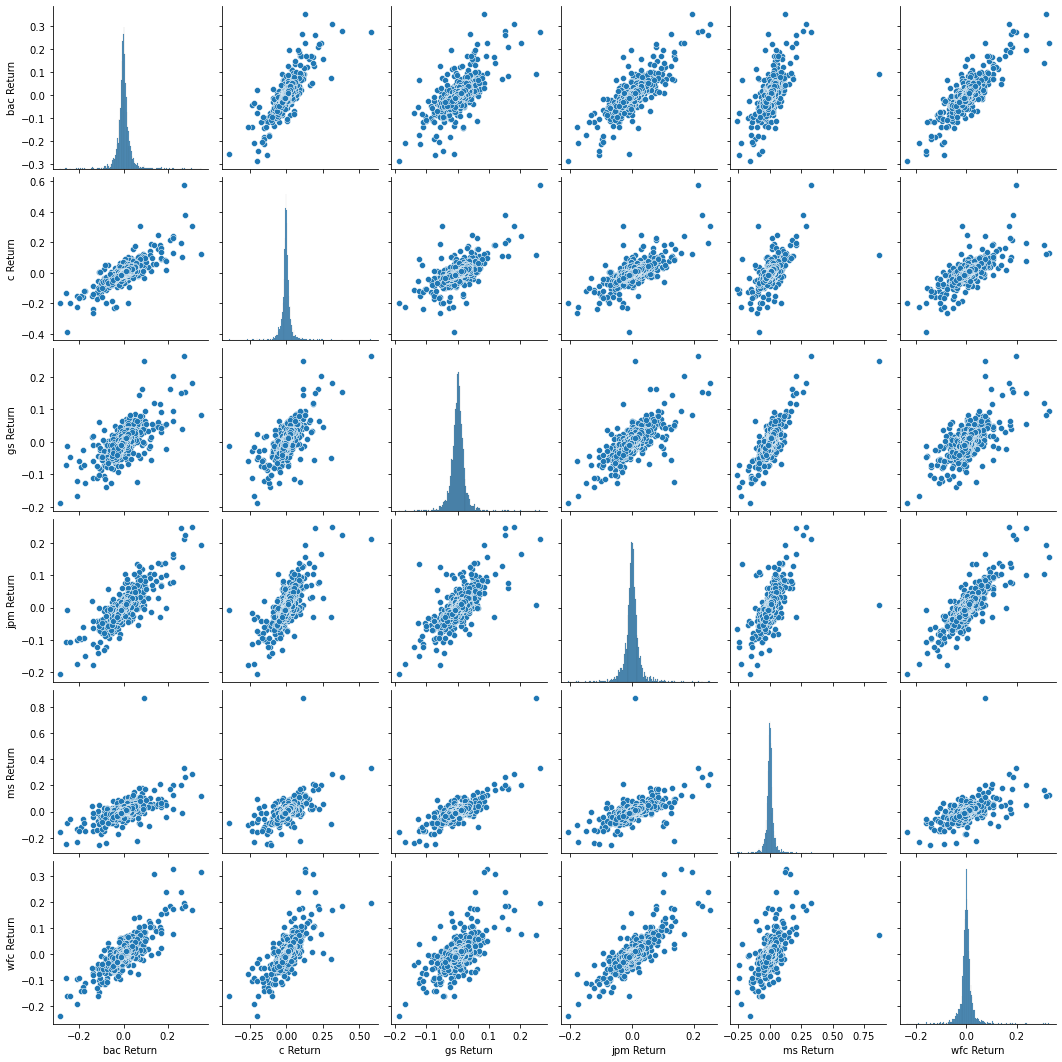

In [12]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [13]:
returns.idxmin()

bac Return   2009-01-20
c Return     2009-02-27
gs Return    2009-01-20
jpm Return   2009-01-20
ms Return    2008-10-09
wfc Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [14]:
returns.idxmax()

bac Return   2009-04-09
c Return     2008-11-24
gs Return    2008-11-24
jpm Return   2009-01-21
ms Return    2008-10-13
wfc Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [15]:
returns.loc["2015-01-01":"2015-12-31"].std()

bac Return    0.016149
c Return      0.015280
gs Return     0.014027
jpm Return    0.013965
ms Return     0.016008
wfc Return    0.012547
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/Users/pchase/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ms Return', ylabel='Density'>

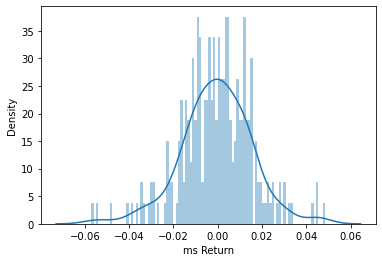

In [16]:
sns.distplot(returns.loc["2015-01-01":"2015-12-31"]["ms Return"], bins = 100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/pchase/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='c Return', ylabel='Density'>

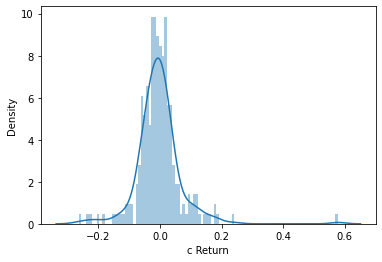

In [17]:
sns.distplot(returns.loc["2008-01-01":"2008-12-31"]["c Return"], bins = 100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

In [19]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# For Notebooks
init_notebook_mode(connected=True)
import plotly.express as px

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [20]:
xs_close = bank_stocks.xs(key="Close", axis=1, level="Stock Info")
xs_close.reset_index(inplace=True, drop = False)
xs_close.columns = xs_close.columns.str.upper()

In [21]:
fig = px.line(xs_close, x = "DATE", y = xs_close.columns,
             hover_data={"DATE": "|%B %d, %Y"}, 
             title = "Bank Stock Values at Close")
fig.update_xaxes(
    tickformat="%b\n%Y",
    )
fig.show()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [43]:
BAC = web.DataReader("BAC", 'stooq', start, end)
BAC["Rolling"] = BAC["Close"].rolling(window=30).mean()
BAC.reset_index(inplace=True, drop = False)
px.line(BAC, x = "Date", y = ["Close", "Rolling"], range_x = ["2008-01-01","2009-01-01"])

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

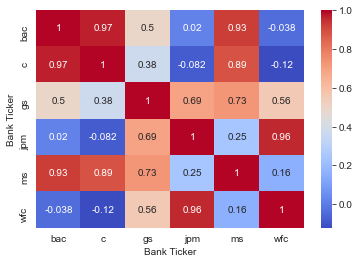

In [55]:
sns.heatmap(bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").corr(), cmap = "coolwarm", annot = True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

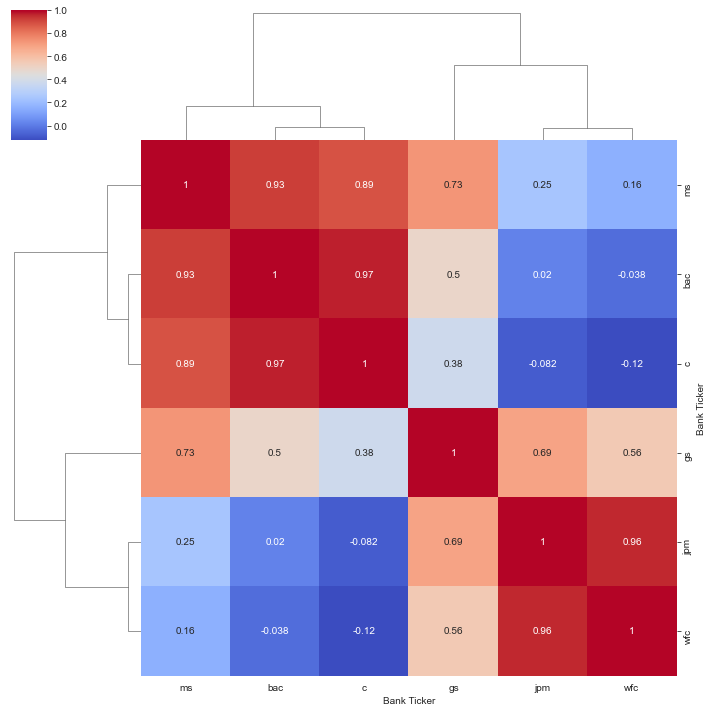

In [56]:
sns.clustermap(bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").corr(), cmap = "coolwarm", annot = True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [62]:
import plotly.graph_objects as go

In [63]:
fig = go.Figure(data = [go.Candlestick(x=BAC["Date"],
                                      open = BAC["Open"],
                                      high = BAC["High"], 
                                      low = BAC["Low"],
                                      close = BAC["Close"])])
fig.show()

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [64]:
MS = web.DataReader("MS", 'stooq', start, end)
MS["Rolling"] = MS["Close"].rolling(window=30).mean()
MS.reset_index(inplace=True, drop = False)
px.line(MS, x = "Date", y = ["Close", "Rolling"], range_x = ["2015-01-01","2016-01-01"])

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.